In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from ml_metrics import rmsle
from ipywidgets import widgets
from sklearn.cross_validation import train_test_split

# Use seaborn styles for nice-looking plots
import seaborn; seaborn.set()

%matplotlib inline

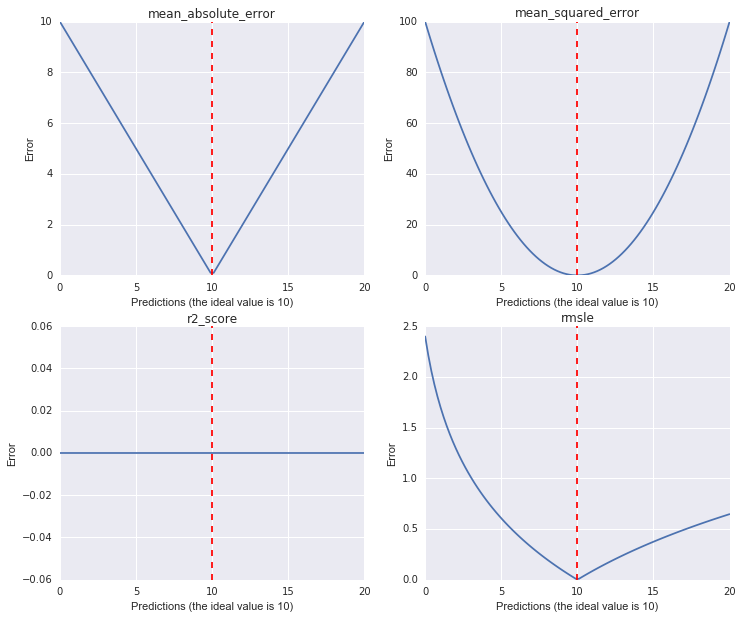

In [83]:
fig = plt.figure(figsize=(12, 10))

y_true = [10]
y_preds = np.linspace(0, 20, 100)
axs = [fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)]

metrics = [mean_absolute_error, mean_squared_error, r2_score, rmsle]
for i, metric in enumerate(metrics):
    err    = [ metric(y_true, [y_pred]) for y_pred in y_preds ]
    
    axs[i].plot(y_preds, err)
    axs[i].set_xlabel("Predictions (the ideal value is {0})".format(y_true[0]))
    axs[i].set_ylabel("Error")
    axs[i].set_title(metric.__name__)
    #axs[i].set_ylim(-10, y_true[0]**2)
    axs[i].axvline(x=y_true[0],color='r',ls='dashed')


#print [c for c in dir(axs[i]) if "vline" in c]

plt.show()

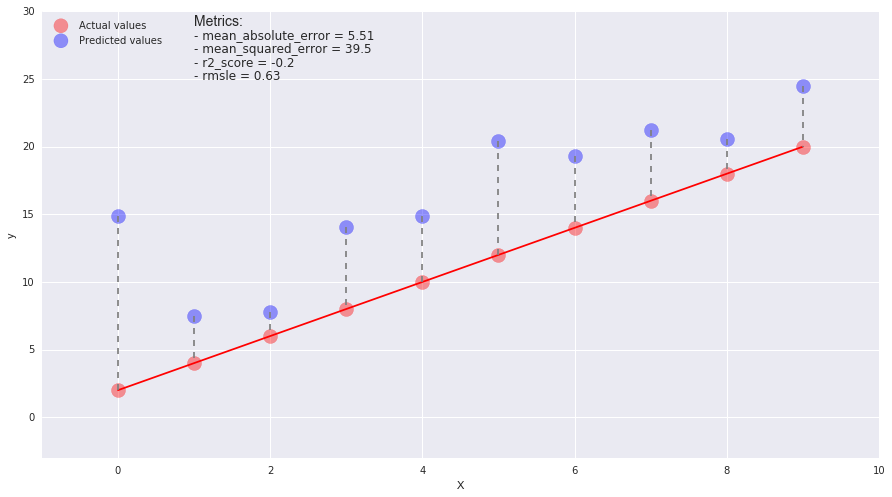

In [317]:
def ground_truth(x):
    """Ground truth -- function to approximate"""
    return x*2 + 2

def gen_data(n_samples):
    """generate training and testing data"""
    np.random.seed(15)
    X = np.arange(n_samples)
    
    offset = np.random.uniform(1, 15, size=n_samples)
    y_pred = ground_truth(X) + offset
    y_true = ground_truth(X)
    
    return X, y_pred, y_true

X, y_pred, y_true = gen_data(10)

metrics = [mean_absolute_error, mean_squared_error, r2_score, rmsle]

def plot_data(alpha=0.4, s=200):
    fig = plt.figure(figsize=(15, 8))

    plt.plot(X, y_true, color = 'r')
    plt.scatter(X, y_true, s=s, alpha=alpha, color='r', label="Actual values")
    plt.scatter(X, y_pred, s=s, alpha=alpha, color='b', label="Predicted values")
    
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('X')
    
    plt.legend( loc='upper left' )
    plt.xlim(-1, 10)
    plt.ylim(-3, 30)
 

    for i, x in enumerate(X):
        plt.plot([x, x], [y_pred[i], y_true[i]], color = 'grey', ls='dashed')
    
    
    plt.text(1, 29, 'Metrics:', fontsize=14)
    for i, metric in enumerate(metrics):
        score = round(metric(y_true, y_pred), 2)
        plt.text(1, 28 - i, '- {0} = {1}'.format(metric.__name__, score), fontsize=12)
    
    plt.show()
    
    

plot_data()